<a href="https://www.kaggle.com/code/mudassirabbassi/sign-language-detection?scriptVersionId=268993289" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import different libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt


2025-10-18 18:19:46.280565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760811586.533599      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760811586.606421      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading the Data

In [2]:
data = tf.keras.utils.image_dataset_from_directory(

    "/kaggle/input/indian-sign-language-isl/Indian",
    shuffle =True,
    image_size = (128, 128),
    batch_size =4
)

Found 42745 files belonging to 35 classes.


I0000 00:00:1760811620.012093      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


# Finding out the class name

In [3]:
class_name = data.class_names
class_name

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [4]:
len(data)

10687

# Finding out the dimensionality of the Data

In [5]:
for image_batch,label_batch in data.take(1):
  print(image_batch.shape)
  print(label_batch[0].numpy())


(4, 128, 128, 3)
25


In [6]:
for image_size,label in data.take(1):
  # print(image_size)
  print(image_size.ndim)
    # print(label)

4


# Observing the differnet images

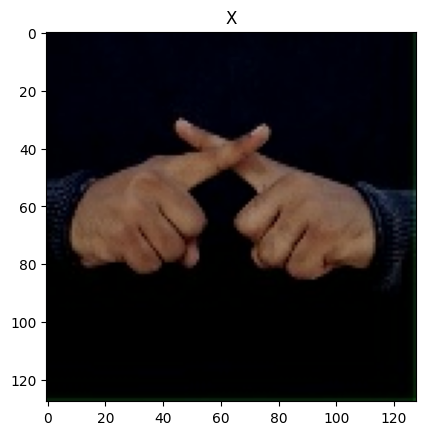

In [7]:
for image_batch,label_batch in data.take(1):    
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_name[label_batch[0]])

# Train Test Split

In [8]:
train_ds =data.take(1036) 
len(train_ds)

1036

In [9]:
test_ds = data.skip(1036)
len(test_ds)
test_ds = data.take(150)
len(test_ds)

150

In [10]:
valid_ds = data.skip(1186)
len(valid_ds)
valid_ds = data.take(150)
len(valid_ds)

150

In [11]:
print(len(train_ds))
print(len(test_ds))
print(len(valid_ds))      

1036
150
150


# Shuffling the dataset

In [12]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)

# Rescaling the Images

In [14]:
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

# DataAugmnetation

In [15]:
data_augmnet = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
]
)

In [16]:
import tensorflow as tf
tf.config.optimizer.set_experimental_options({'layout_optimizer': False})


In [17]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_name)

In [18]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=input_shape),  #  Add this single Input layer at the start
    resize_and_rescale,               # your preprocessing layer
    data_augmnet,                     # your augmentation layer

    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.30),

    # Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.40),

    # Classification Head
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),
    layers.Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 331,843 (1.27 MB)

 Trainable params: 330,435 (1.26 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Fix here
    metrics=['accuracy']
)


In [20]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=9
)

Epoch 1/9


I0000 00:00:1760811632.700437      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


1036/1036 ━━━━━━━━━━━━━━━━━━━━ 47s 34ms/step - accuracy: 0.1322 - loss: 3.3660 - val_accuracy: 0.1000 - val_loss: 6.9392
Epoch 2/9
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.3787 - loss: 2.0152 - val_accuracy: 0.6133 - val_loss: 1.1033
Epoch 3/9
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.5558 - loss: 1.3719 - val_accuracy: 0.4917 - val_loss: 2.2376
Epoch 4/9
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.6343 - loss: 1.1087 - val_accuracy: 0.4150 - val_loss: 2.3463
Epoch 5/9
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.7063 - loss: 0.8762 - val_accuracy: 0.4850 - val_loss: 2.3964
Epoch 6/9
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.7278 - loss: 0.8612 - val_accuracy: 0.9083 - val_loss: 1.0052
Epoch 7/9
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.7863 - loss: 0.6632 - val_accuracy: 0.8517 - val_loss: 0.9831
Epoch 8/9
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.8079 - loss: 0.5983 - va